Nama         : Helmi Saifullah Mansur

Program      : Python for Data Science

Kode Peserta : PYTN-KS04-010

# Pandas EP.2 "EDA With Pandas"
## Data Cleaning with Pandas
<b>Sources of Missing Values</b>
    
- what are the features?
- What are the expected types (int, float, string, boolean)?
- is there obvious missing data (values that pandas can detect)?
- is there other types of missing data thats not so obvious (can't easily detect with Pandas)?

In [1]:
import numpy as np
import pandas as pd

In [2]:
df =  pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


beberapa feature dataset dapat dilihat dari nama kolom:
- ST_NUM : street number
- ST_NAME : street name
- OWN_OCCUPIED : is the residence owner occupied
- NUM_BEDROOMS : number of bedrooms

berikut untuk tipe yg diharapkan:
- ST_NUM : float or int .. some sort of numeric type
- ST_NAME : string
- OWN_OCCUPIED : string ... Y("yes" or N("No")
- NUM_BEDROOMS : float or int, a numeric type

## Standard Missing Values
yaitu missing values yg dapat dideteksi pandas

In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull() #mendeteksi missing value

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non-Standard Misiing Values
terkadang ada kasus dimana ada missing values yg memiliki format berbeda. seperti n/a, --, na

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

cara mudah utk mendeteksi berbagai format ini adalah dgn memasukkannya ke dalam list. kemudian saat import data, pandas akan langsung mengenalinya

In [8]:
missing_values = ["n/a", "na", "--"]

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [11]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## Unexpected Missing Values
contoh ada kolom yg harusnya isinya berupa string tapi ada salah satu yg tipenya numeric

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [13]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

berikut cara mengatasinya :

- loop pada kolom OWN_OCCUPIED
- Kita coba ubah  semua entry menjadi integer
- jika entry tdk dpt diubah menjadi integer, tanai sebagai missing value
- jika tdk dpt menjadi integer, maka kita tau kaau entry adalah string, keep going

In [14]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [15]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


disini kita mengubah entri menjadi isiing value menggunakan np.nan dan jika tdk dpt diubah kita pass dan keep going.

kita menggunakan try dan except ValueError. ini disebut exception handling, dan kita menggunakan ini untuk menangani errors.

## Summarizing Missing Values
melihat jumlah total missing values untuk setiap feature

In [16]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [17]:
#pemeriksaan cepat utk melihat apakah kita memiliki missing value
df.isnull().values.any()

True

In [18]:
#mendapatkan jumlah total missing values
df.isnull().sum().sum()

12

## Replacing
mengganti missing value dgn suatu nilai

In [19]:
#maybe u just want to fill in missing values with a single value
df['ST_NUM'].fillna(125, inplace=True)

In [20]:
#cara melakukan imputasi berbasis lokal/location based imputation
df.loc[2, 'ST_NUM'] = 125

In [21]:
Median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(Median, inplace = True)

In [22]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England
investigate:

| Children are getting fatter every decade

In [26]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [27]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [28]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [33]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [34]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili kolom headers. Kita memiliki baris kososng di file asli, dan itu muncul sebagai NaN(Bukan angka). Jadi sekarang kita perlu melakukan 2 hal:
- rename the first header to year, and
- get rid of any empty rows

In [36]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

#inplace = True modifies the existing object. Without this, Pandas will create
#a new object and return that

In [37]:
#menghapus baris kosong yang diisi dengan NaN
data_age.dropna(inplace=True)

In [38]:
#mengubah index menjadi tahun agar mempermudah pembuatan plot
#karena indeks biasanya diplot sebagai sumbu x
data_age.set_index('Year', inplace=True)

In [39]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

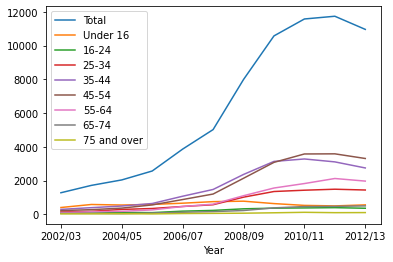

In [40]:
#membuat plot
data_age.plot()

masalah : data asli berisi total yang menutupi bidang lainnya, kita perluu menyingkirkannya

In [43]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

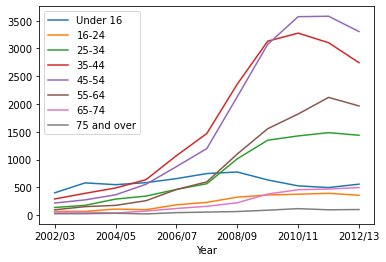

In [44]:
#plot ulang
data_age_minus_total.plot()

membuat plot sebagian kecil data:anak-anak dibawah 16 tahun dan orang dewasa rentang usia 35-44 tahun

<AxesSubplot:xlabel='Year'>

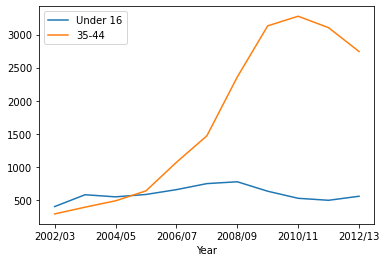

In [45]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

## Time Series
### Basic Time Series Manipulation

In [46]:
#imort library yg dibutuhkan dan gunakan untuk membuat data range
from datetime import datetime

In [47]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [48]:
#data range ini memiliki timestamp dgn frekuensi per jam.
#jika memanggil date_rng kita akan melihat seperti berikut
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [49]:
#contoh data frame dgn timestamp dan lihat 15 elemen pertama
df = pd.DataFrame(date_rng, columns=['date'])

In [51]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [52]:
df.head()

,date,data
0,2020-01-01 00:00:00,92
1,2020-01-01 01:00:00,41
2,2020-01-01 02:00:00,52
3,2020-01-01 03:00:00,82
4,2020-01-01 04:00:00,86


jika ingin melakukan manipulasi deret waktu/time series, kita perlu memiliki time index sehingga data frame kita diindeks pada timestamp

konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama:

In [53]:
df['datetime'] = pd.to_datetime(df['date'])

In [54]:
df = df.set_index('datetime')

In [55]:
df.drop(['date'], axis=1, inplace=True)

In [56]:
df.head()

,data
datetime,
2020-01-01 00:00:00,92
2020-01-01 01:00:00,41
2020-01-01 02:00:00,52
2020-01-01 03:00:00,82
2020-01-01 04:00:00,86


bagaimana jika 'time stamps' dalam data kita sebenarnya berjnis string vs numerik?

mari kita ubah date_rng menjadi list of string dan kemudian ubah string tsb menjadi stempel waktu

In [57]:
string_date_rng = [str(x) for x in date_rng]

In [58]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [60]:
#kita dapat mengonversi string menjdi timestamps dgn melihat formatnya
#lalu melihat nilainya:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [61]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

tetapi bagaimana jika kita perlu mengubah format unique string?

mari kita buat daftar tanggal yg berubah-ubah menjadi string dan mengubahnya menjadi timestamps:

In [62]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [63]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [64]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [66]:
#seperti apa jadinya jika kita memasukkan ini ke dalam data frame?
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [67]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [68]:
#misal ingin melihat data dmana tanggalnya adlh 2 setiap buannya, 
#kita bisa menggunakan indeks spt dibawah ini
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,10
2020-01-02 01:00:00,42
2020-01-02 02:00:00,13
2020-01-02 03:00:00,65
2020-01-02 04:00:00,79
2020-01-02 05:00:00,73
2020-01-02 06:00:00,29
2020-01-02 07:00:00,12
2020-01-02 08:00:00,10


In [69]:
#kita juga bisa langsung memanggil tanggal yg ingin kita lihat melalui index dari dataframe
df['2020-01-03']

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,data
datetime,
2020-01-03 00:00:00,80
2020-01-03 01:00:00,63
2020-01-03 02:00:00,13
2020-01-03 03:00:00,62
2020-01-03 04:00:00,78
2020-01-03 05:00:00,42
2020-01-03 06:00:00,77
2020-01-03 07:00:00,51
2020-01-03 08:00:00,28


In [70]:
#Bagaimana dgn memilih data diantara tanggal tertentu?
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,11
2020-01-04 01:00:00,76
2020-01-04 02:00:00,54
2020-01-04 03:00:00,59
2020-01-04 04:00:00,25
...,...
2020-01-06 19:00:00,84
2020-01-06 20:00:00,52
2020-01-06 21:00:00,65


kita dapat mengambil ulang sampel/resample data pd frekuensi yg berbeda & menetukan bagaimana kita ingin menghitung summary statistic utk frekuensi sampel baru.

kita dpt mengambil min, max, average, sum, dll. Dari data pd frekuensi harian drpd frekuensi perjam spt contoh dibawah ini tempat kita menghitung rata" harian dr data:

In [71]:
df.resample('D').mean()

,data
datetime,
2020-01-01,55.791667
2020-01-02,45.541667
2020-01-03,50.166667
2020-01-04,46.708333
2020-01-05,49.541667
2020-01-06,51.125000
2020-01-07,54.208333
2020-01-08,14.000000


In [72]:
#bagaimana dgn window statistic seperti rolling mean/rolling sum?
#mari kita buat kolom baru di df asli yg menghitung rolling sum selama 3 window & kemudian lihat di bagian atas data frame:
df['rolling_sum'] = df.rolling(3).sum()

In [73]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,92,NaN
2020-01-01 01:00:00,41,NaN
2020-01-01 02:00:00,52,185.0
2020-01-01 03:00:00,82,175.0
2020-01-01 04:00:00,86,220.0


In [74]:
#berikut df kita, tetapi dgn kolom baru yg mengambil rolling sum & backfills data:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [75]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,92,NaN,185.0
2020-01-01 01:00:00,41,NaN,185.0
2020-01-01 02:00:00,52,185.0,185.0
2020-01-01 03:00:00,82,175.0,175.0
2020-01-01 04:00:00,86,220.0,220.0


### Time Series on Dataset

In [76]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [77]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [78]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [79]:
#krn kolom date adalah tipe data yg benar, mari kita set sebagai indeks dataframe:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [80]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [81]:
#alternatif: kita dpt menggabungkan langkah" diatas menjadi 1 baris
#menggunakan index_col & parse_dates dr fungsi read_csv.
#ini seringkali merupakan jalan pintas yg berguna
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [82]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Aspek berguna lainnya dr DatetimeIndex adalah setiap komponen tanggal/waktu tersedia sbg atribut seperti tahun, bulan, hari, dst. mari tambahkan bbrp kolom lagi ke opsd_daily, yg berisi tahun, bulan, dan hari kerja

In [84]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [85]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [86]:
#kita dpt memilih data utk 1 hari menggunakan string seperti '2017-08-10'
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [89]:
#kita juga dpt memilih slice dr hari, seperti '2014-01-20':'2014-01-22'.
#seperti pengindeksan label biasa dgn loc, 
#skice tsb menyertakan kedua titik akhir
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


fitur lain yg sgt berguna dr time series pandas adalah partial-string indexing, dimna kita dpt memilih semua tanggal/waktu yg sbgn cocok dgn stringyg diberikan

In [92]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


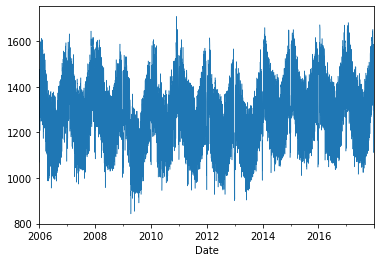

In [93]:
#membuat line plot dr time series konsumsi listrik harian di jerman,
#menggunakan method plot() dataframe
opsd_daily['Consumption'].plot(linewidth=0.5);

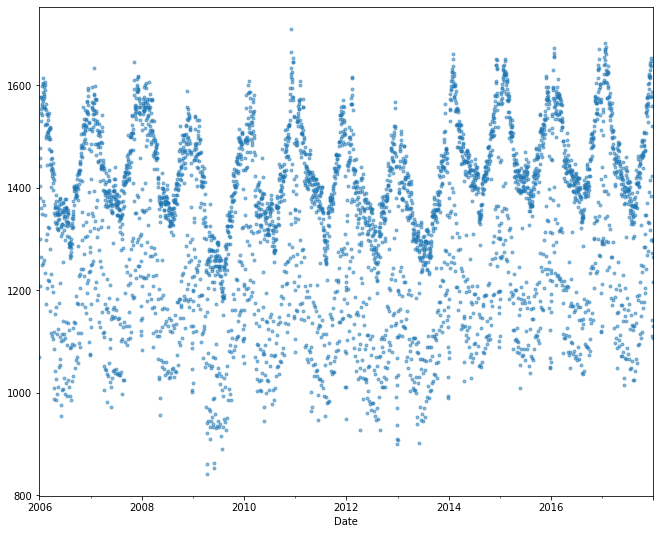

In [94]:
#mari kita plot data sebagai titik-titik, dan lihat time series dr matahari & angin
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

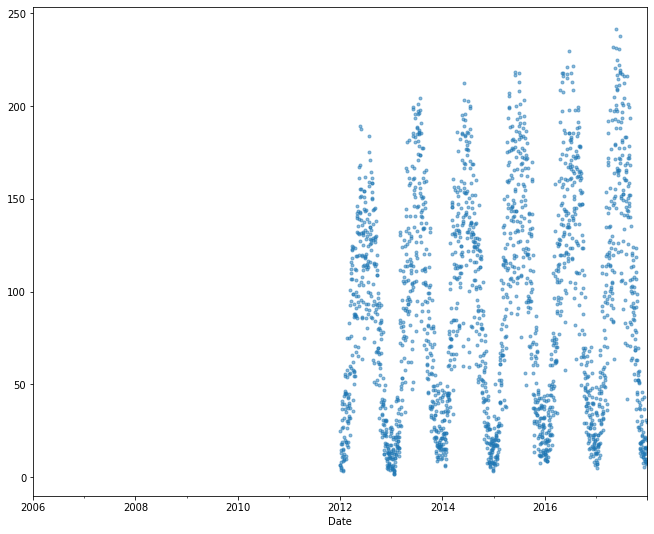

In [95]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

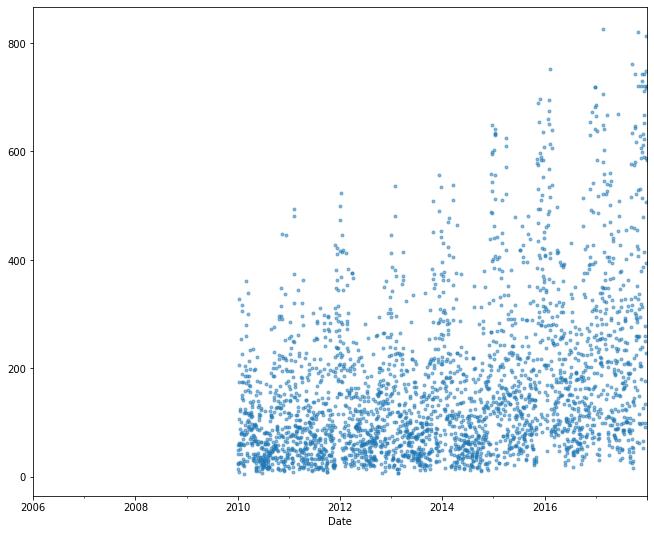

In [96]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9));

Text(0, 0.5, 'Daily Consumption (Gwh)')

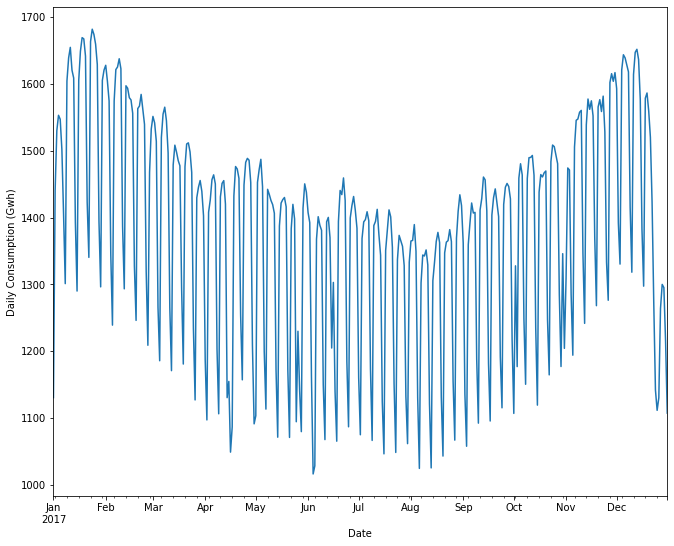

In [97]:
#plot deret waktu dlm 1 tahun  utk menyelidiki lebih lanjut
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (Gwh)')

Text(0, 0.5, 'Daily Consumption (Gwh)')

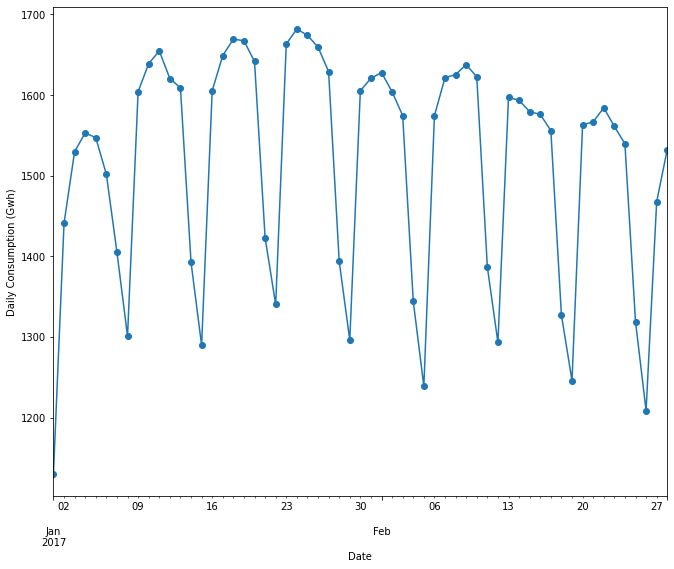

In [98]:
#lihat bulan januari dan februari saja
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11,9))
ax.set_ylabel('Daily Consumption (Gwh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

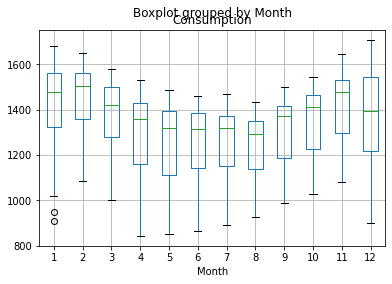

In [100]:
#box plot untuk mengelompokkan data berdasarkan periode waktu yg berbeda & menampilkan distribusi setiap kelompok
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

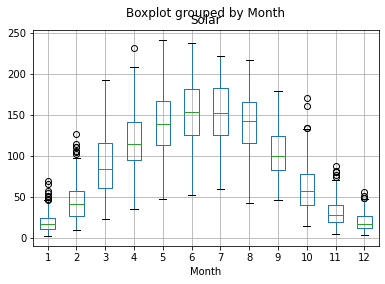

In [101]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

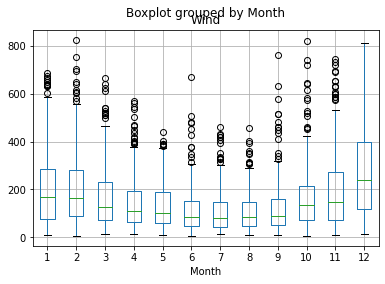

In [102]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

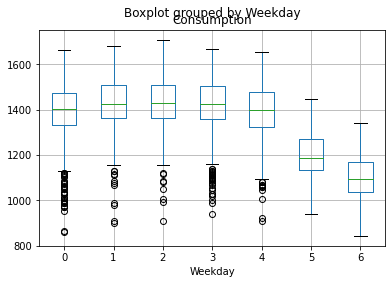

In [107]:
#kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dlm seminggu
#utk menjelajahi weekly seasonity
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [108]:
#resample data menjadi weekly man data time series
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [109]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<AxesSubplot:xlabel='Date'>

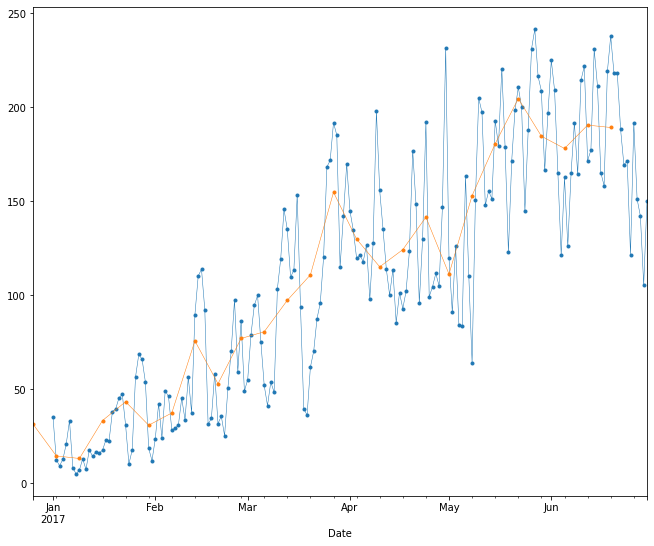

In [112]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))